In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
# test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train = pd.read_csv("/Users/ingluissantana/Desktop/Py/all_data/titanic_train.csv")
test = pd.read_csv("/Users/ingluissantana/Desktop/Py/all_data/titanic_test.csv")



In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [7]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

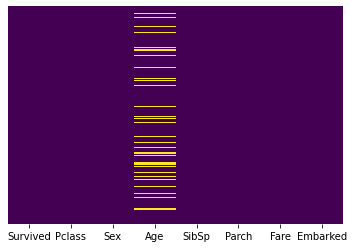

In [19]:
#Plotting null values heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


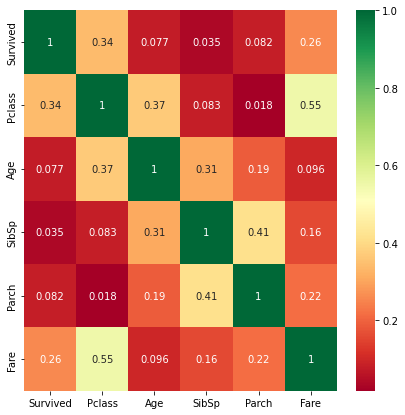

In [33]:
#Plotting correlation heatmap
corr = train.corr()
corr = corr.apply(abs)
plt.figure(figsize=(7,7))
map = sns.heatmap(corr,annot=True,cmap="RdYlGn")

0    549
1    342
Name: Survived, dtype: int64

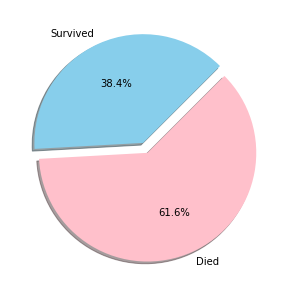

In [34]:
#Plotting the Pie chart
fig = plt.figure(figsize=(5,5))
colors = ["skyblue",'pink']
surv = train[train['Survived']==1]
died = train[train['Survived']==0]
ck = [surv['Survived'].count(),died['Survived'].count()]
piechart = plt.pie(ck,labels=["Survived","Died"],
autopct ='%1.1f%%',
shadow = True,
colors = colors,
startangle = 45,
explode=(0, 0.1))
train.Survived.value_counts()

<AxesSubplot:xlabel='Age', ylabel='Count'>

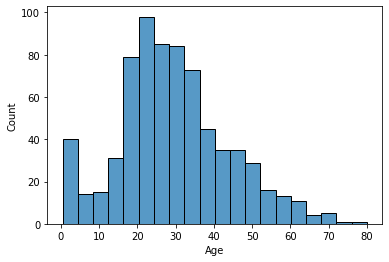

In [38]:
sns.histplot(train['Age'].dropna())

<AxesSubplot:xlabel='Parch', ylabel='Count'>

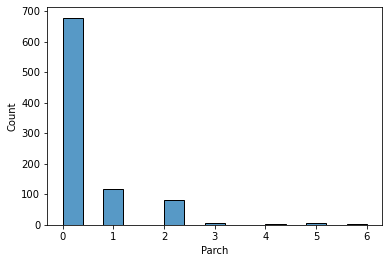

In [39]:
sns.histplot(train['Parch'].dropna(),bins=15)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

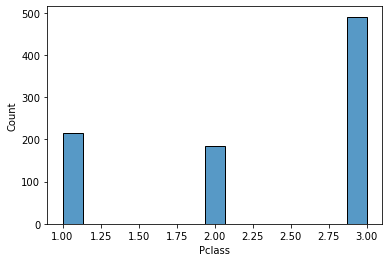

In [40]:
sns.histplot(train['Pclass'].dropna(),bins=15)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

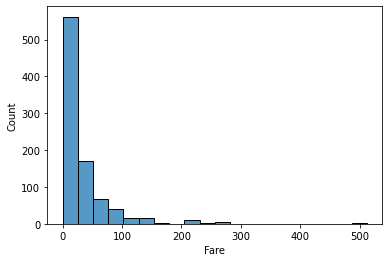

In [41]:
sns.histplot(train['Fare'].dropna(),bins=20)

/Users/ingluissantana/opt/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

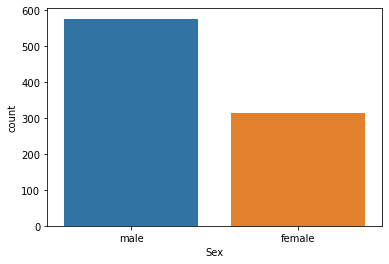

In [42]:
sns.countplot(train['Sex'].dropna())

## Features Enginnering

In [43]:
#Replacing null values by column mean
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [44]:
#Replacing 0’s & nulls by column mean
train['Fare'] = train['Fare'].replace(0, train['Fare'].mean())
train['Fare'].replace('nan',np.nan,inplace=True)
train['Fare'].fillna(train['Fare'].mean(),inplace=True)
test['Fare'] = test['Fare'].replace(0, test['Fare'].mean())
test['Fare'].replace('nan',np.nan,inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [45]:
#Replacing nulls by column mean 
train['Embarked'].replace('nan',np.nan,inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].replace('nan',np.nan,inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

In [46]:
#Printing unique values in 'Sex' column
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [47]:
#Mappping categorical to numeric
train['Sex']=train['Sex'].map({'male':0,'female':1})
test['Sex']=test['Sex'].map({'male':0,'female':1})

In [48]:
#Printing unique values in 'Embarked' column
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [49]:
#Mappping categorical to numeric
train['Embarked']=train['Embarked'].map({'S':0,'C':1,'Q':2})
test['Embarked']=test['Embarked'].map({'S':0,'C':1,'Q':2})

In [50]:
#Handling skewness in 'Age' column
train['Age']=np.log(train['Age'])
test['Age']=np.log(test['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

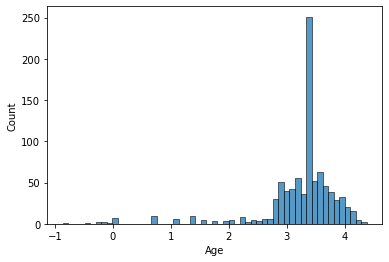

In [52]:
sns.histplot(train['Age'].dropna())

In [53]:
#Handling skewness in 'Fare' column
test['Fare']=np.log(test['Fare'])
train['Fare']=np.log(train['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

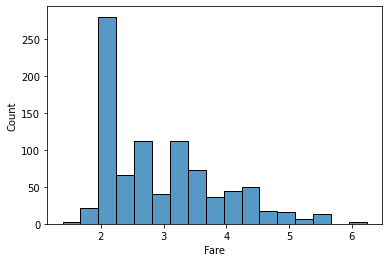

In [55]:
sns.histplot(train['Fare'].dropna())

In [56]:
#Dropping the 'Survived' column
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [57]:
#Splitting the data into train & test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [58]:
#Defining the parameters to search within
param_grid = {
'n_estimators': range(6, 10),
'max_depth': range(3, 8),
'learning_rate': [.2, .3, .4],
'colsample_bytree': [.7, .8, .9, 1]
}
#Specifying our classifier
xgb = XGBClassifier()
#Searching for the best parameters
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
#Fitting the model using best parameters found
g_search.fit(x_train, y_train)
#Printing the best parameters found
print(g_search.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 7}


In [ ]:
#Calculating the model's score
g_search.score(x_test,y_test)

In [59]:
#Predicting the actual test data
g_search.predict(test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [12]:
# men = train_data.loc[train_data.Sex == 'male']["Survived"]
# rate_men = sum(men)/len(men)

# print("% of men who survived:", rate_men)